# Municipal Waste Management Cost Prediction

-------------------------------------------------------------------------------------------

***Data Description*:**

1) Variable ----> Label
2) region ----> Region
3) province ---->  Province
4) name  ---->  Name of municipality
5) tc  ---->  Cost per capita eur
6) cres  ----> residual cost per capita
7) csor  ---->  Sorted cost per caputa
8) istat  ---->  National code
9) area  ---->  km2
10) pop  ---->  population
11) alt  ---->  altitude m.s.l.
12) isle  ---->  dummy municipality on isle
13) sea  ---->  dummy coastal municipality
14) pden  ---->  population density (people per km2)
15) wden  ---->  waste per km2
16) urb  ---->  urbanization index (1 low, 3 high)
17) fee  ---->  fee scheme
18) d_fee  ---->  dmmy PAYT
19) sample  ---->  Reg with PAYT
20) organic  ---->  organic %
21) paper  ---->  paper%
22) glass  ---->  glass %
23) wood  ---->  wood %
24) metal  ---->  metal %
25) plastic  ---->  plastic %
26) raee  ---->  raee %
27) texile  ---->  texile %
28) other  ---->  other %
29) msw_so  ---->  msw sorted kg
30) msw_un  ---->  msw unsorted kg
31) msw  ---->  Municipal solid waste kg
32) sor  ---->  Share of sorther waste
33) geo  ---->  1 South, 2 Center, 3 North
34) roads  ---->  Km of roads within the municipality
35) s_wteregio  ---->  Share of sw sent to W2E plants - regional figure
36) s_landfill  ---->  share of waste to landifil
37) gdp  ---->  Municipal revenues EUR (p) - log
38) proads  ---->  People per km of roads (log)
39) wage  ---->  Taxable income EUR (p) - log
40) finance  ---->  Municipal revenues EUR (p) - log

*Cite the DataSet*: 

Di Foggia, Giacomo (2022), “Municipal waste management cost and fee schemes ”, Bicocca Open Archive Research Data, V1, doi: 10.17632/w5f9kg7743.1

"**Project Idea** :"

https://fabianwerkmeister.notion.site/Municipal-Waste-Management-308d939f86084d459abce4117fb3a426

## Data Analysis 

-----

In [160]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

In [121]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 50)

In [122]:
data = pd.read_csv("dataset/public_data_waste_fee.csv")
data.head()

,region,province,name,tc,cres,csor,istat,area,pop,alt,isle,sea,pden,wden,urb,fee,d_fee,sample,organic,paper,glass,wood,metal,plastic,raee,texile,other,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
0,Emilia_Romagna,Ferrara,Comacchio,502.250000,129.270004,66.419998,38006,283.750000,22648,1.0,0.0,1.0,79.816742,119671.476562,2.0,PAYT,1,1,NaN,4.363508,3.592508,2.269844,0.462317,1.131815,0.346470,0.112243,3.199499,20396261.0,13560520,33956781,60.07,3.0,285.0,33.105049,15.233530,7.269942,4.354818,9.438692,7.488041
1,Emilia_Romagna,Ferrara,Lagosanto,228.050003,49.520000,44.139999,38011,34.439999,4952,1.0,0.0,1.0,143.786301,70030.984375,3.0,PAYT,1,1,35.040904,9.887817,9.518352,4.001796,1.860965,4.643623,1.608505,0.351429,9.019776,1831407.0,580460,2411867,75.93,3.0,11.0,33.105049,15.233530,7.109984,6.082588,9.510139,7.323284
2,Emilia_Romagna,Ferrara,Goro,268.010010,50.610001,44.599998,38025,26.620001,3895,1.0,0.0,1.0,146.318558,81116.523438,3.0,PAYT,1,1,37.377010,11.991079,6.653014,0.000013,0.744725,5.224834,NaN,0.449308,16.040081,1694922.0,464400,2159322,78.49,3.0,49.0,33.105049,15.233530,7.267856,4.335555,8.891356,7.485891
3,Emilia_Romagna,Ferrara,Mesola,199.089996,41.110001,40.439999,38014,84.300003,7140,1.0,0.0,1.0,84.697502,43320.460938,3.0,PAYT,1,1,45.310474,9.762878,7.551381,0.148580,0.746540,5.202531,NaN,0.400064,9.769176,2881055.0,770860,3651915,78.89,3.0,165.0,33.105049,15.233530,7.085936,3.710479,9.433685,7.298514
4,Puglia,Barletta-Andria-Trani,Margherita di Savoia,233.639999,58.270000,25.950001,110005,35.700001,12193,1.0,0.0,1.0,341.540619,201565.265625,2.0,STANDARD,0,0,0.428440,6.601569,4.334883,2.296731,0.103101,5.120555,0.275157,0.287387,4.052555,3026700.0,4169180,7195880,42.06,1.0,60.0,4.046452,45.411903,7.247444,5.274037,9.125561,7.464867


In [123]:
# data.region.value_counts()

In [124]:
data.columns

Index(['region', 'province', 'name', 'tc', 'cres', 'csor', 'istat', 'area',
       'pop', 'alt', 'isle', 'sea', 'pden', 'wden', 'urb', 'fee', 'd_fee',
       'sample', 'organic', 'paper', 'glass', 'wood', 'metal', 'plastic',
       'raee', 'texile', 'other', 'msw_so', 'msw_un', 'msw', 'sor', 'geo',
       'roads', 's_wteregio', 's_landfill', 'gdp', 'proads', 'wage',
       'finance'],
      dtype='object')

In [125]:
data.region.nunique()

20

In [126]:
data.province.nunique()

102

In [127]:
data.shape

(4341, 39)

In [128]:
data.isnull().sum().sort_values(ascending = False)

wood          1095
texile        1013
organic        512
roads          443
proads         443
gdp            386
finance        386
raee           314
s_landfill     285
s_wteregio     285
geo            285
wage           285
metal          246
other          136
csor            67
cres            52
plastic         39
glass           33
paper           25
isle             6
name             6
urb              6
wden             6
pden             6
sea              6
area             6
alt              6
province         0
tc               0
istat            0
pop              0
msw              0
sor              0
sample           0
msw_un           0
msw_so           0
fee              0
d_fee            0
region           0
dtype: int64

In [129]:
## changing name of columns for better understanding

data = data.rename(columns = {
    "name" : "municipality"
})

In [130]:
data.columns

Index(['region', 'province', 'municipality', 'tc', 'cres', 'csor', 'istat',
       'area', 'pop', 'alt', 'isle', 'sea', 'pden', 'wden', 'urb', 'fee',
       'd_fee', 'sample', 'organic', 'paper', 'glass', 'wood', 'metal',
       'plastic', 'raee', 'texile', 'other', 'msw_so', 'msw_un', 'msw', 'sor',
       'geo', 'roads', 's_wteregio', 's_landfill', 'gdp', 'proads', 'wage',
       'finance'],
      dtype='object')

## Data Analysis Track 

-------------------------------------------------------

###  Cost Analysis 

-------------------------------------------------------------

### 1. Cost per capita compared by regions, provinces and municipalities 
----------------------------------------------------------------------------

In [131]:
## calculating cost per capita compared by regions, provinces and muninipalities

cpc_reg_pro_mun = data.groupby(["region", "province", "municipality"])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"})
cpc_reg_pro_mun

,region,province,municipality,avg_cost_per_capita
0,Abruzzo,Chieti,Altino,103.910004
1,Abruzzo,Chieti,Archi,107.879997
2,Abruzzo,Chieti,Atessa,198.559998
3,Abruzzo,Chieti,Bomba,195.229996
4,Abruzzo,Chieti,Borrello,180.070007
...,...,...,...,...
4330,piemonte,Novara,Soriso,88.599998
4331,piemonte,Novara,Suno,108.830002
4332,piemonte,Novara,Varallo Pombia,113.980003
4333,piemonte,Torino,Torino,210.380005


In [132]:
## calculating cost per capita compared by regions

cpc_reg = data.groupby(["region"])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",
                                                                                                                           ascending = False)
cpc_reg

,region,avg_cost_per_capita
7,Liguria,243.466257
14,Toscana,222.293421
16,Umbria,193.846272
17,Valle_d'Aosta,189.690002
11,Puglia,189.348730
12,Sardegna,181.866694
13,Sicilia,175.637783
3,Campania,172.440814
6,Lazio,170.894574
4,Emilia_Romagna,166.595877


C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


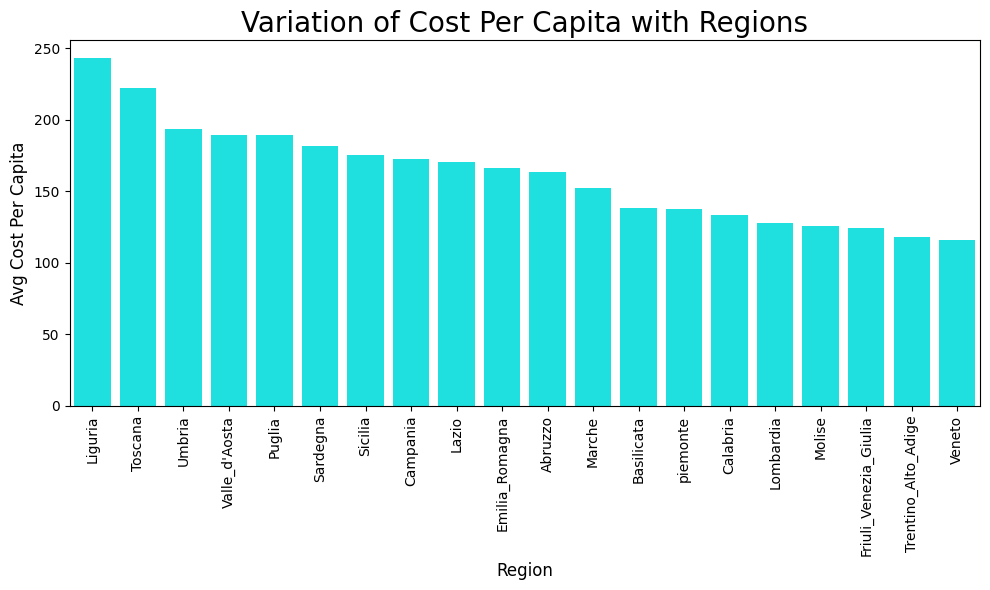

In [133]:
## Visualize the result for better understanding

plt.figure(figsize = (10,6))
sns.barplot(x = cpc_reg["region"],
            y = cpc_reg["avg_cost_per_capita"],
            color = 'cyan')
plt.title("Variation of Cost Per Capita with Regions", size = 20)
plt.xlabel("Region", size = 12)
plt.ylabel("Avg Cost Per Capita", size = 12)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [134]:
## Defining a function that will perform analysis as well as plotting

def cpc_plotting(column):
    '''
    calculating avg cost per capita first , show the output and then plotting the result
    '''
    result = data.groupby([column])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",
                                                                                                                           ascending = False)
    print("------- Result ----------\n")
    print(f"Cost Per capita region wise {result}")
    '''
    plotting the results and formatting it clearly
    '''
    plt.figure(figsize = (10,6))
    sns.barplot(x = result[column],
                y = result["avg_cost_per_capita"],
                color = 'cyan')
    plt.title("Variation of Cost Per Capita with {}".format(column), size = 20)
    plt.xlabel("{}".format(column), size = 12)
    plt.ylabel("Avg Cost Per Capita", size = 12)
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

In [135]:
## Defining a function that will perform analysis as well as plotting for multiple columns

def cpc_mul_plotting(data, columns):
    '''
    calculating avg cost per capita first , show the output and then plotting the result
    '''
    result = data.groupby(columns)['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",
                                                                                                                           ascending = False)
    print("------- Result ----------\n")
    print(f"Cost Per capita region wise {result}")
    '''
    plotting the results and formatting it clearly
    '''
    plt.figure(figsize = (10,6))
    sns.barplot(x = ",".join(columns),
                y = "avg_cost_per_capita",
                data = result,
                color = 'cyan')
    plt.title("Variation of Cost Per Capita with {}".format(", ".join(columns)), size = 20)
    plt.xlabel("{}".format(", ".join(columns)), size = 12)
    plt.ylabel("Avg Cost Per Capita", size = 12)
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show()

------- Result ----------

Cost Per capita region wise                    region  avg_cost_per_capita
7                 Liguria           243.466257
14                Toscana           222.293421
16                 Umbria           193.846272
17          Valle_d'Aosta           189.690002
11                 Puglia           189.348730
12               Sardegna           181.866694
13                Sicilia           175.637783
3                Campania           172.440814
6                   Lazio           170.894574
4          Emilia_Romagna           166.595877
0                 Abruzzo           163.679548
9                  Marche           152.199515
1              Basilicata           138.555217
19               piemonte           137.750878
2                Calabria           133.203939
8               Lombardia           127.963756
10                 Molise           125.685714
5   Friuli_Venezia_Giulia           124.681312
15    Trentino_Alto_Adige           118.059554
18   

C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


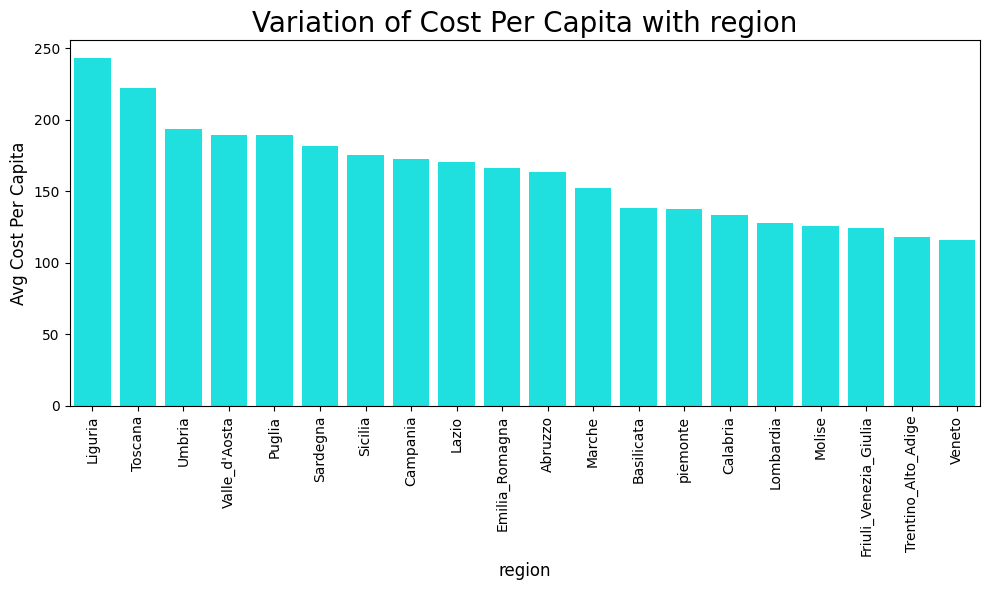

In [136]:
## calculating cost per capita compared by regions

cpc_plotting("region")

------- Result ----------

Cost Per capita region wise       province  avg_cost_per_capita
45     Livorno           377.646472
41   La Spezia           296.873000
37    Grosseto           290.714618
38     Imperia           278.713460
47       Lucca           258.421726
..         ...                  ...
46        Lodi           107.308571
29       Fermo           105.447143
100    Vicenza            95.614845
14     Bolzano            91.966087
97    Vercelli            78.459999

[102 rows x 2 columns]


C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


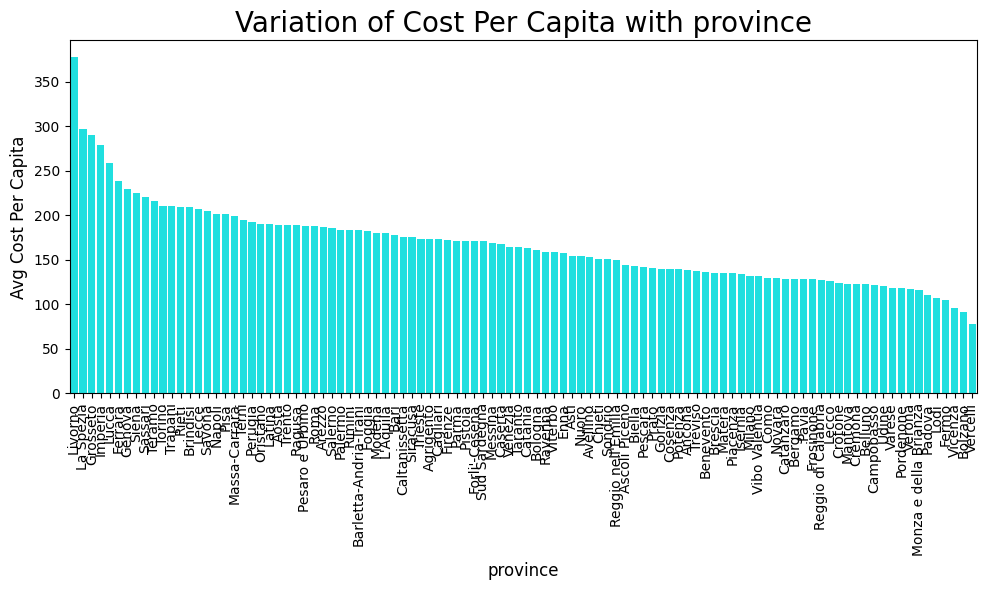

In [137]:
## calculating cost per capita compared by province

cpc_plotting("province")

In [138]:
## calculating cost per capita compared by region, province

# cpc_plotting("municipality_name")

In [139]:
# cpc_mul_plotting(data, ['region', 'province'])

### 2. Cost per capita compared by area, urbanity and population density

------------------------------------------------------------

In [140]:
## removing null values in area column
# data['area'].dropna(inplace = True)

In [141]:
## categorizing the area of the whole data

data['area'].min(), data['area'].max(), data['area'].mean()

(0.119999997317791, 1287.390014648438, 40.995044960762186)

In [142]:
data[data['area'] > data['area'].mean()]['area'].nunique()

1206

In [143]:
np.percentile(data['area'].dropna(), 12.5)

6.429999828338623

In [144]:
data[data['area'] > 47.490002]['area'].count()

1083

In [145]:
## statistically distriution

data['area'].describe()

count    4335.000000
mean       40.995045
std        56.784025
min         0.120000
25%        10.850000
50%        22.730000
75%        47.490002
max      1287.390015
Name: area, dtype: float64

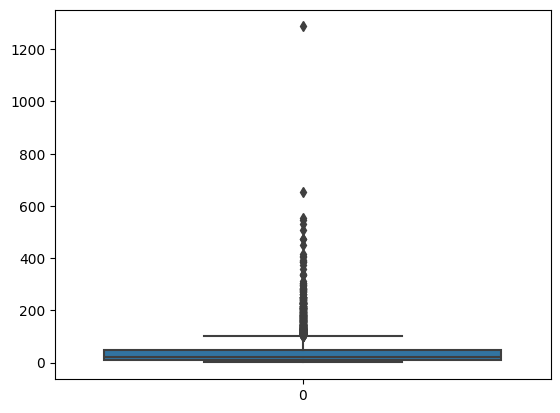

In [146]:
## plotting the area of the data to get better understanding

sns.boxplot(data['area'])
plt.show()

C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


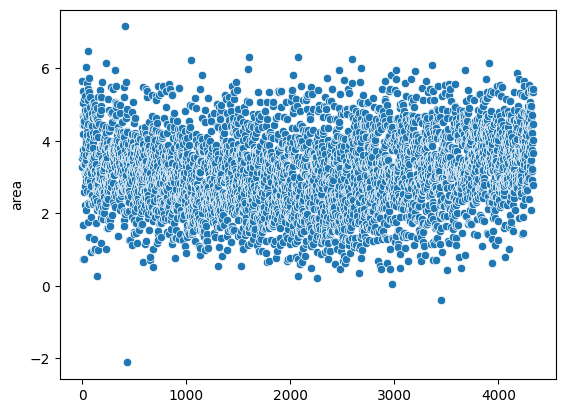

In [147]:
## plotting the scatter plot of the area column

sns.scatterplot(np.log(data['area']))
plt.show()

In [148]:
## Categorizing the area data in the original data

bins = [data['area'].min(), np.percentile(data['area'].dropna(), 12.5), np.percentile(data['area'].dropna(), 25),
        np.percentile(data['area'].dropna(), 37.5), np.percentile(data['area'].dropna(), 50), 
        np.percentile(data['area'].dropna(), 75), np.percentile(data['area'].dropna(), 95),
        np.percentile(data['area'].dropna(), 99), data['area'].max()]

labels = ['12.5 percentile', '25th percentile', '37.5 percentile', '50th percentile', '75th percentile', '95th percentile', '99th percentile', 'more than 99th percentile']

## creating new column with the bins and labels
data['area_cat'] = pd.cut(data['area'], bins = bins, labels = labels, right = False)

## checking the final result
data[['area', 'area_cat']]

,area,area_cat
0,283.750000,more than 99th percentile
1,34.439999,75th percentile
2,26.620001,75th percentile
3,84.300003,95th percentile
4,35.700001,75th percentile
...,...,...
4336,NaN,NaN
4337,NaN,NaN
4338,NaN,NaN
4339,NaN,NaN


In [149]:
## Cost per capita analysis areawise

cpc_area = data.groupby(['area_cat'])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",
                                                                                                                           ascending = False)
cpc_area

C:\Users\saiba\AppData\Local\Temp\ipykernel_9728\4020839019.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpc_area = data.groupby(['area_cat'])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",


,area_cat,avg_cost_per_capita
7,more than 99th percentile,205.983023
6,99th percentile,189.931214
5,95th percentile,171.668007
4,75th percentile,153.035171
2,37.5 percentile,147.888158
3,50th percentile,145.423993
1,25th percentile,143.405488
0,12.5 percentile,139.377204


In [150]:
## variation of population density in data

data['pden'].describe()

count     4335.000000
mean       405.048252
std        771.211960
min          2.479942
25%         62.588707
50%        151.323624
75%        399.364822
max      12122.826172
Name: pden, dtype: float64

C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


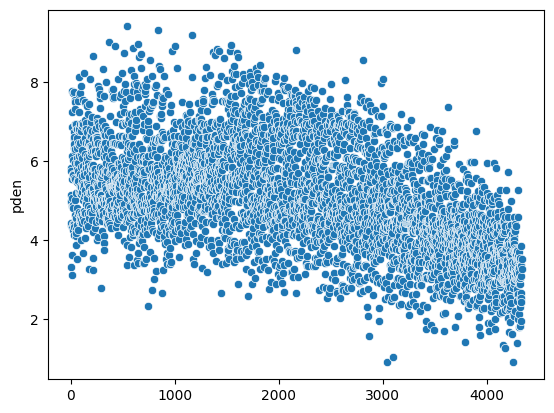

In [151]:
## variation of population density throughout the data

sns.scatterplot(np.log(data['pden']))
plt.show()

In [152]:
## Cost per capita analysis population density wise

cpc_pden = data.groupby(['pden'])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",
                                                                                                                           ascending = False)
cpc_pden

,pden,avg_cost_per_capita
92,12.515490,977.419983
43,9.214092,948.109985
896,49.978287,853.219971
3770,833.514709,823.900024
2261,162.196304,809.169983
...,...,...
371,24.783861,39.889999
81,11.707109,30.150000
1976,130.213638,29.980000
125,14.434137,27.610001


In [153]:
data['urb'].value_counts()

urb
3.0    2349
2.0    1761
1.0     225
Name: count, dtype: int64

C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


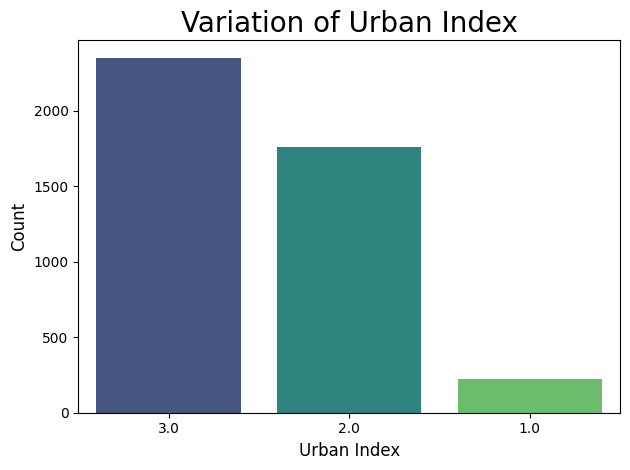

In [154]:
## variation of urban index throughout the data

# data['urb'].value_counts().plot(kind = 'bar')
sns.countplot(x = 'urb', data = data, order = data['urb'].value_counts().index, palette = 'viridis')
plt.title('Variation of Urban Index', size=20)
plt.xlabel('Urban Index', size=12)
plt.ylabel('Count', size=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [155]:
## Cost per capita analysis urban index wise

cpc_urb = data.groupby(['urb'])['tc'].mean().reset_index().rename(columns = {"tc" : "avg_cost_per_capita"}).sort_values(by = "avg_cost_per_capita",
                                                                                                                           ascending = False)
cpc_urb

,urb,avg_cost_per_capita
0,1.0,165.082400
2,3.0,155.972252
1,2.0,150.656996


#### 2.1 Variation of Cost Per Capita with Urbanity and Population Density

-----------------------------------------------------------

C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


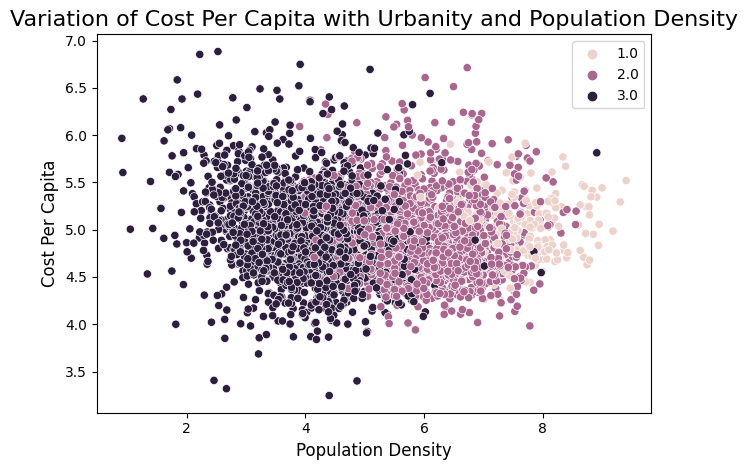

In [156]:
## Visualizing the variation of cost per capita with urbanity(urb) and population density

sns.scatterplot(x = np.log(data['pden']),
                y = np.log(data['tc']),
                hue = data['urb'],
                color = "viridis")
plt.title("Variation of Cost Per Capita with Urbanity and Population Density", size = 16)
plt.xlabel("Population Density", size = 12)
plt.ylabel("Cost Per Capita", size = 12)
plt.legend()
plt.tight_layout()
plt.show()

**Variation of Cost Per Capita with Population Density and Urbanity Index is clearly visible.**  

---> As the Population Density increases, urbanity decreases(1 - Low, 2 - Medium, 3 - High) but there is rear change in cost per capita. 

---> Spread of Cost per Capita for both Urban Index 2 and 3 are more where for urban index 1, spread of cost per capita less spread. 
 
---> The relation between Population Density and Cost Per Capita is more or less linear, not much variation.  

#### 2.2 Variation of Cost Per Capita with area and urbanity

------------------------------------------------------------------------

C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\saiba\anaconda3\envs\jupyter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


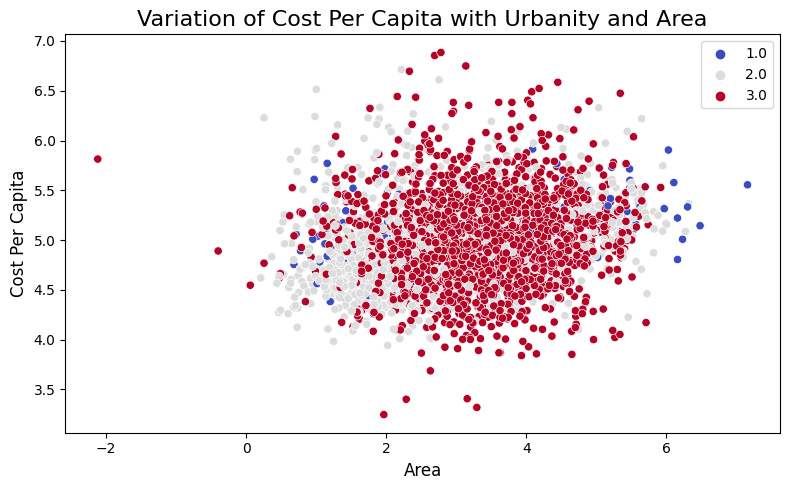

In [157]:
## Visualizing the variation of cost per capita with urbanity(urb) and area

plt.figure(figsize = (8,5))
sns.scatterplot(x = np.log(data['area']),
                y = np.log(data['tc']),
                hue = data['urb'],
                palette = "coolwarm")
plt.title("Variation of Cost Per Capita with Urbanity and Area", size = 16)
plt.xlabel("Area", size = 12)
plt.ylabel("Cost Per Capita", size = 12)
plt.legend()
plt.tight_layout()
plt.show()

**Observation from above Visualization**

---> For Urbanity Index Higher(urb = 3) and Medium(urb = 2), cost per capita is distributed symmetrically within q1 to q3 for area within Lower and Higher Interquertile range. 

---> Urbanity Index = 1, has almost similar cost per index but area variation is either higher or lower.

### 3. Compare geo-regions by Costs and Waste Composition

-------------------------------------------------------------

#### 3.1 Which part of Italy is producing most of the Waste!

----------------------------------------------------------------

In [158]:
## Groupby `geo` and calculate avg cost per capita(tc), Avg Municipal solid waste kg(msw) , Avg Share of sorther waste(sor)

avg_cpc_msw_sor = data.groupby(['geo'])[['tc', 'msw', 'sor']].mean().reset_index().rename(columns = {'tc' : 'avg_cost_per_capita',
                                                                                                     'msw': 'avg_municipal_waste',
                                                                                                     'sor': 'avg_sorther_waste'})
avg_cpc_msw_sor

,geo,avg_cost_per_capita,avg_municipal_waste,avg_sorther_waste
0,1.0,164.405619,5.326622e+06,60.391095
1,1.5,246.899999,2.798864e+06,49.866667
2,2.0,192.533315,9.957932e+06,62.218353
3,3.0,139.313124,4.646057e+06,70.813925
